<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Names" data-toc-modified-id="Names-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Names</a></span><ul class="toc-item"><li><span><a href="#Restrict-notebooks" data-toc-modified-id="Restrict-notebooks-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Restrict notebooks</a></span></li><li><span><a href="#Count-once-by-notebook" data-toc-modified-id="Count-once-by-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Count once by notebook</a></span></li><li><span><a href="#Count-all-uses-across-all-notebooks" data-toc-modified-id="Count-all-uses-across-all-notebooks-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Count all uses across all notebooks</a></span></li></ul></li><li><span><a href="#Others" data-toc-modified-id="Others-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Others</a></span></li></ul></div>

# Names

Analyze variable names

In [1]:
import sys

sys.path.insert(0, "../archaeology")
sys.path.insert(0, "../analysis")
from collections import Counter
from IPython.display import display

import pandas as pd
import numpy as np

from db import connect
from analysis_helpers import display_counts, calculate_auto

%matplotlib inline

In [2]:
%%time
with connect() as session:
    # print('Last query:', session.query(Query).all()[-1])
    raw_names = pd.read_sql_table("notebook_names", session.connection())
    print("Notebook Names:", len(raw_names))

Notebook Names: 20690
CPU times: user 9.87 s, sys: 943 ms, total: 10.8 s
Wall time: 11.1 s


In [3]:
# prefix = ["any", "nonlocal", "local", "class", "global", "main"]
# suffix = ["any", "class", "import", "importfrom", "function", "param", "del", "load", "store"]
prefix = ["any"]
suffix = ["any"]

for p in prefix:
    for s in suffix:
        column = "{}_{}".format(p, s)
        print(column)
        raw_names[column + "_dict"] = raw_names.apply(
            (
                lambda r: {
                    k: int(v)
                    for k, v in zip(
                        r[column].split(","), r[column + "_counts"].split(",")
                    )
                    if k
                    if int(v)
                }
            ),
            axis=1,
        )
        raw_names[column + "_count"] = raw_names[column + "_dict"].apply(
            lambda x: sum(x.values())
        )
        raw_names[column + "_count_unique"] = raw_names[column + "_dict"].apply(
            lambda x: sum(1 for _ in x)
        )

any_any


In [4]:
raw_names.head(5)

,id,repository_id,notebook_id,index,index_count,any_any,any_any_counts,any_class,any_class_counts,any_import,...,main_del_counts,main_load,main_load_counts,main_store,main_store_counts,others,skip,any_any_dict,any_any_count,any_any_count_unique
0,1,6,2,"1,3,5,7,9,13,15,18,20,21,23,24,26,29,32,34,35,...",36,"root_dir,k,name,feature_start_frame,sim_a_tmr_...","14,12,12,11,11,8,7,7,7,6,6,5,5,5,4,4,4,4,4,4,4...",,,os,...,,"root_dir,feature_start_frame,sim_a_tmr_data,na...","12,10,10,9,8,8,7,6,6,5,4,4,4,4,4,3,3,3,3,3,3,3...","k,name,root_dir,relen,sf,f,_,wss_avg,wss_std,m...","4,3,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...",,0,"{'root_dir': 14, 'k': 12, 'name': 12, 'feature...",279,88
1,2,8,3,"4,6,8,11,13,15,17,19,21,23,25,27,31,32,33,34,3...",18,"np,os,plt,idp_dir,clr,xx,W,warp_param,s2,yhat,...","45,33,24,20,19,19,12,12,12,11,10,10,10,10,9,8,...",,,"os,np,pd,pickle,sns",...,,"np,os,plt,idp_dir,xx,clr,W,warp_param,s2,print...","44,32,23,18,18,17,11,11,11,10,10,9,8,8,7,7,6,6...","junk,f,elem,yhat_te,s2_te,idp_ids,idp_num,idp,...","9,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,...",,0,"{'np': 45, 'os': 33, 'plt': 24, 'idp_dir': 20,...",565,105
2,3,8,4,"4,6,8,10,12,14,16,17",8,"os,np,idp_dir,y_te,y_tr,df_tr,idp,df_te,nm,out...","27,26,15,13,12,8,8,7,7,6,6,6,6,5,5,4,4,4,4,4,4...",,,"os,np,pd,pickle,sns",...,,"os,np,idp_dir,y_tr,y_te,df_tr,idp,nm,out_dir,d...","26,25,13,10,10,6,6,6,5,5,5,4,4,4,4,3,3,3,3,3,3...","f,y_te,df_tr,df_te,bad_sub,idp_num,idp,idp_dir...","3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,...",,0,"{'os': 27, 'np': 26, 'idp_dir': 15, 'y_te': 13...",316,77
3,4,8,5,"4,6,8,11,14,16,18,20,22,24,25,26,28,30,34,35,3...",20,"np,os,idp_dir,plt,clr,xx,warp_param,W,idp,nm,s...","52,39,26,24,19,19,14,14,13,13,12,11,11,10,10,1...",,,"os,np,pd,pickle,sns",...,,"np,os,idp_dir,plt,xx,clr,W,warp_param,nm,s2,pr...","51,38,23,23,18,17,12,12,11,11,10,10,10,9,8,8,8...","junk,yhat_te,s2_te,med_te,elem,idp_num,idp,idp...","9,4,4,4,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,...",,0,"{'np': 52, 'os': 39, 'idp_dir': 26, 'plt': 24,...",647,116
4,5,8,6,"4,6,8,11,13,15,17",7,"os,np,idp_dir,y_te,y_tr,idp,nm,suffix,out_dir,...","25,24,15,12,11,8,7,6,5,5,5,5,4,4,4,4,4,4,4,4,4...",,,"os,np,pd,pickle,sns",...,,"os,np,idp_dir,y_tr,y_te,idp,nm,out_dir,df_tr,s...","24,23,13,9,9,6,6,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3...","y_te,idp_num,idp,idp_dir,y_tr,suffix,metrics,y...","3,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,...",,0,"{'os': 25, 'np': 24, 'idp_dir': 15, 'y_te': 12...",285,73


## Restrict notebooks

In [5]:
SKIP_MAP = {
    "f_": 1024 + 512,
    "d_": 1024 + 512 + 128,
    "dt_": 1024 + 512 + 128 + 32,
    "dr_": 1024 + 512 + 128 + 64,
}

CONFIG = {
    "Default": "f_",
    "Remove duplicates": "d_",
    "Remove duplicates and toy": "dt_",
    "Remove duplicates and restricted toy": "dr_",
}

In [6]:
@calculate_auto(CONFIG, save_to="names", level=None)
def func(prefix=""):
    return raw_names[np.bitwise_and(raw_names["skip"], SKIP_MAP[prefix]) == 0]

## Count once by notebook

### Default

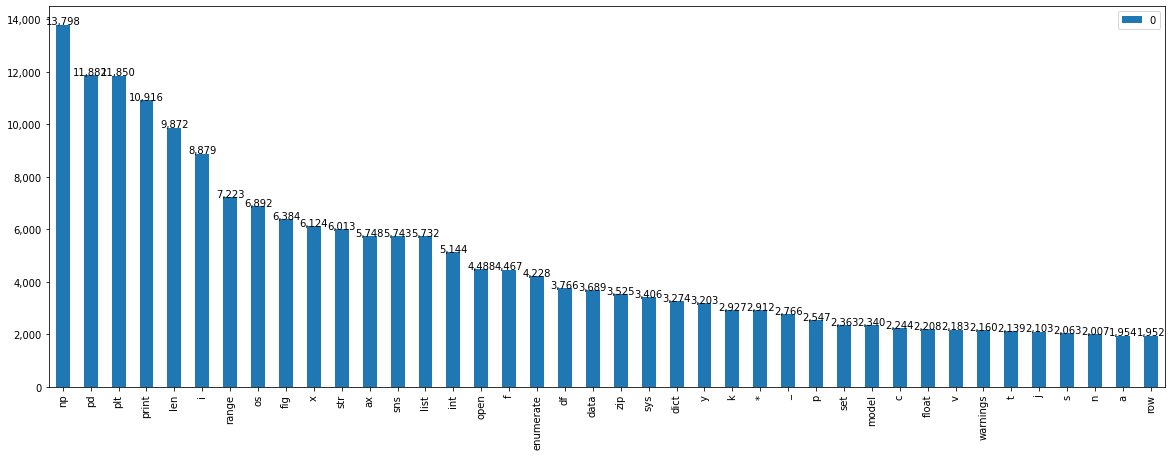

,0
np,13798
pd,11882
plt,11850
print,10916
len,9872
i,8879
range,7223
os,6892
fig,6384
x,6124


### Remove duplicates

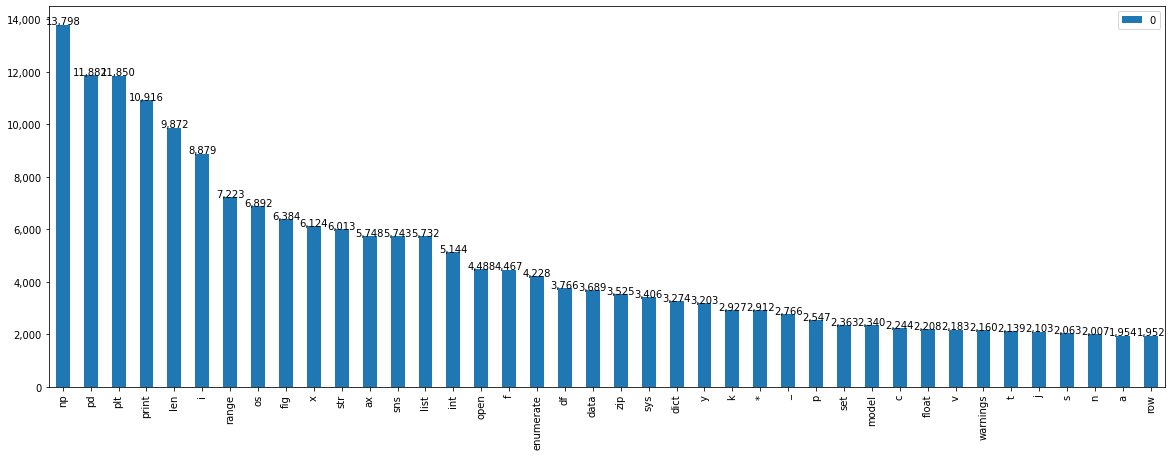

,0
np,13798
pd,11882
plt,11850
print,10916
len,9872
i,8879
range,7223
os,6892
fig,6384
x,6124


### Remove duplicates and toy

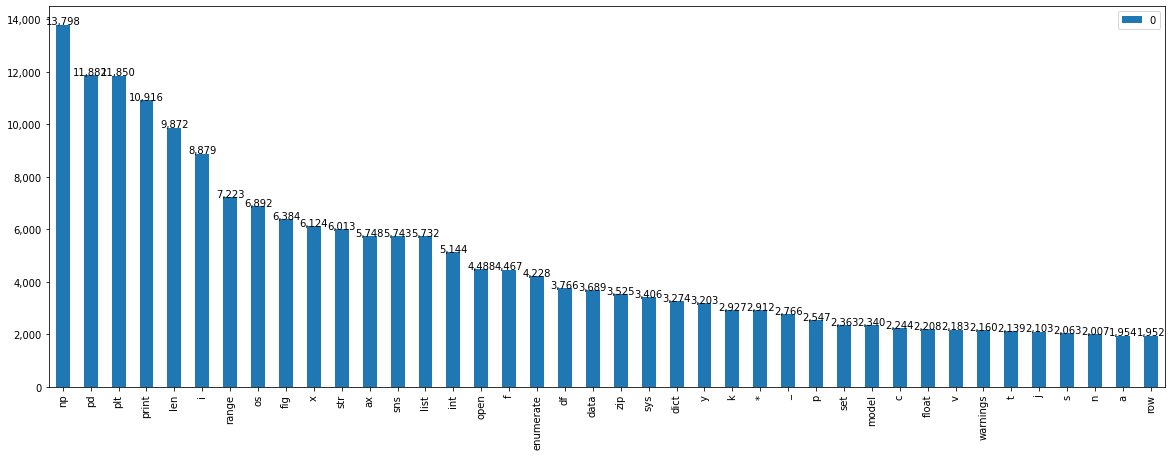

,0
np,13798
pd,11882
plt,11850
print,10916
len,9872
i,8879
range,7223
os,6892
fig,6384
x,6124


### Remove duplicates and restricted toy

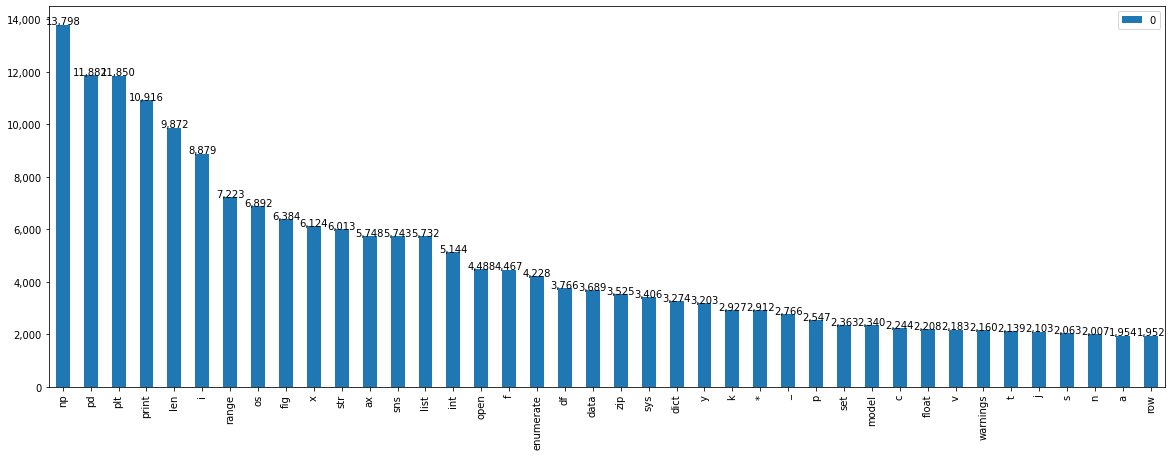

,0
np,13798
pd,11882
plt,11850
print,10916
len,9872
i,8879
range,7223
os,6892
fig,6384
x,6124


In [7]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    counter = Counter()
    names["any_any_dict"].apply(lambda x: counter.update(x.keys()))
    counts = pd.Series(counter).sort_values(ascending=False)
    display_counts(counts, show_values=True, logy=False, cut=slice(None, 40))

## Count all uses across all notebooks


### Default

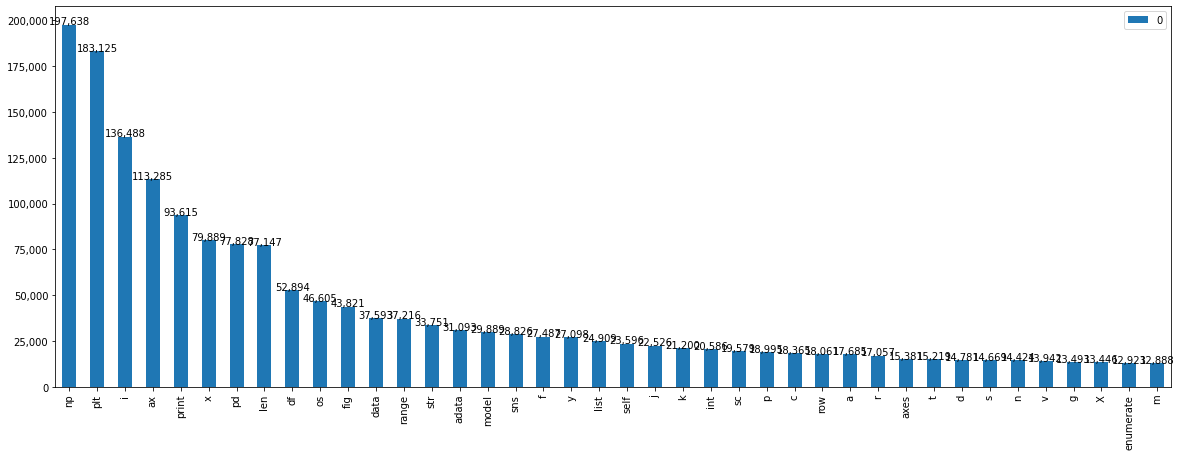

,0
np,197638
plt,183125
i,136488
ax,113285
print,93615
x,79889
pd,77828
len,77147
df,52894
os,46605


### Remove duplicates

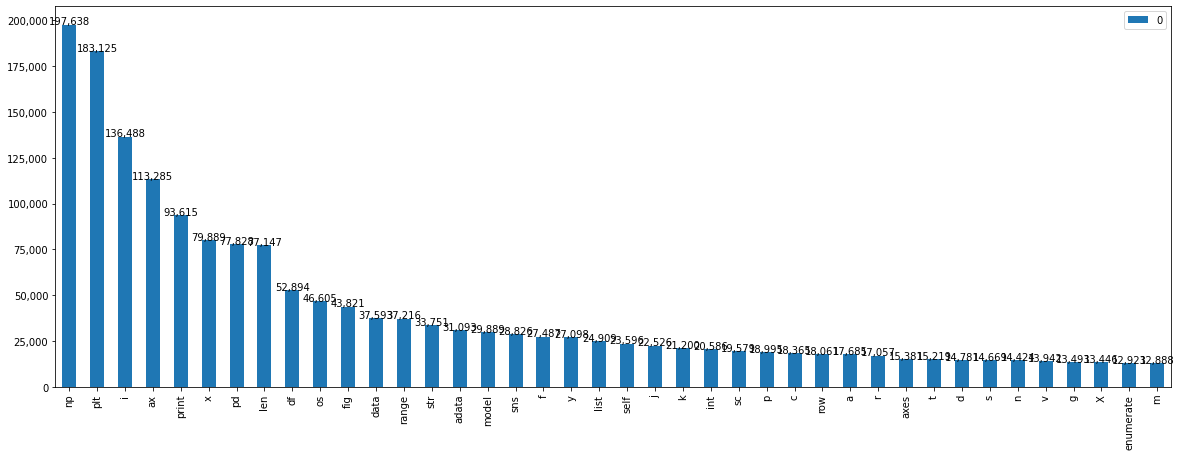

,0
np,197638
plt,183125
i,136488
ax,113285
print,93615
x,79889
pd,77828
len,77147
df,52894
os,46605


### Remove duplicates and toy

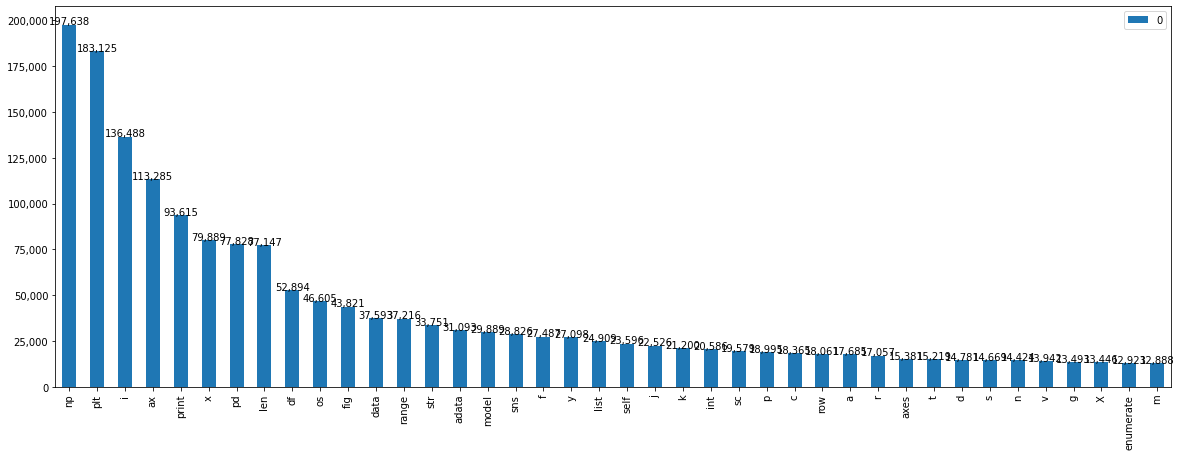

,0
np,197638
plt,183125
i,136488
ax,113285
print,93615
x,79889
pd,77828
len,77147
df,52894
os,46605


### Remove duplicates and restricted toy

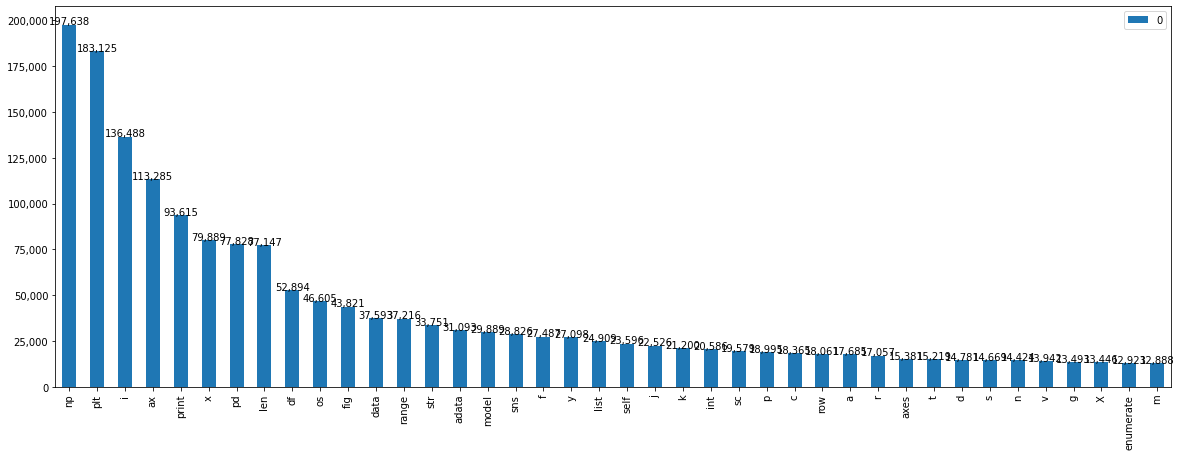

,0
np,197638
plt,183125
i,136488
ax,113285
print,93615
x,79889
pd,77828
len,77147
df,52894
os,46605


In [8]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    counter = Counter()
    names["any_any_dict"].apply(lambda x: counter.update(x))
    counts = pd.Series(counter).sort_values(ascending=False)
    display_counts(counts, show_values=True, logy=False, cut=slice(None, 40))

# Others

In [9]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    return names[names["others"] != ""]

### Default

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates and toy

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates and restricted toy

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto